# k-nearest neighbours
## Dataset

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import cluster_plot
from scipy.spatial import distance_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

df = pd.read_csv('datasets/cancer.csv')
y_le = LabelEncoder()
y = y_le.fit_transform(df['diagnosis'].values)
X = df[df.columns[2:-1]]

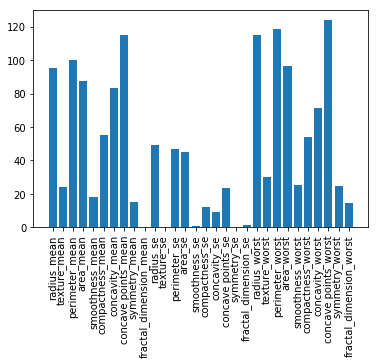

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [251]:
# Selecting most valuable features
selector = SelectKBest(f_classif, k=3)
selector = selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
plt.bar(range(X.shape[1]), scores)
plt.xticks(range(X.shape[1]), X.columns, rotation='vertical')
plt.show()
print(X.columns)

In [252]:
features = ['radius_mean','perimeter_mean','area_mean',
            'compactness_mean', 'concavity_mean', 
            'concave points_mean', 'radius_se', 'radius_worst', 
            'perimeter_worst', 'area_worst', 'compactness_worst', 
            'concavity_worst', 'concave points_worst']
X = X[features]

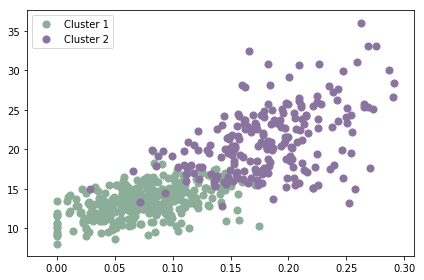

In [254]:
cluster_plot(X[['concave points_worst', 'radius_worst']].values, y)

In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

## Manual implementation

In [281]:
class KnnClassifier:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.y = y
        self.X = X
        return self
    
    def predict(self, data):
        res = []
        for point1 in data:
            # Find indices for the smallest elements
            # Find distances between point and every other element
            d_m = distance_matrix(self.X, np.array([point1]))
            # Use argsort to find indexes of the least distances
            min_idx = d_m.flatten().argsort()[:self.k]
            y_idx = self.y[min_idx]
            # Count how many times every class occures
            counts = np.bincount(y_idx)
            # Class that occures the most is the predicted class
            res.append(np.argmax(counts))
        return np.array(res)

In [282]:
knn = KnnClassifier(3)
knn = knn.fit(X_train.values, y_train)
y_pred = knn.predict(X_test.values)

## Sklearn version

In [269]:
from sklearn.neighbors import KNeighborsClassifier


knn_sk = KNeighborsClassifier(n_neighbors=3)
knn_sk = knn_sk.fit(X_train.values, y_train)
y_pred_sk = knn_sk.predict(X_test.values)

## Comparing accuracy

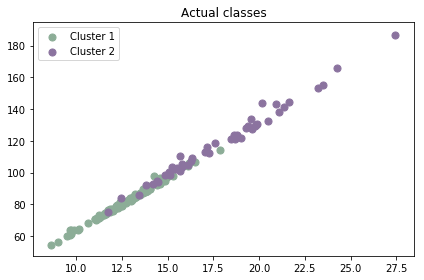

In [283]:
plt.title('Actual classes')
cluster_plot(X_test.values, y_test)

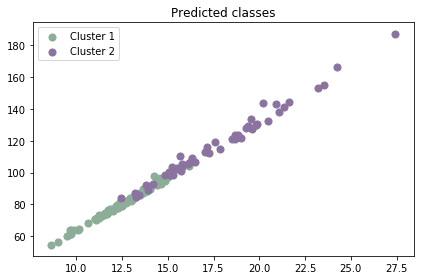

In [271]:
plt.title('Predicted classes')
cluster_plot(X_test.values, y_pred)

In [272]:
from sklearn.metrics import accuracy_score


acc = accuracy_score(y_test, y_pred)
acc_sk = accuracy_score(y_test, y_pred_sk)
print('Accuracy for k-nearest neighbors method:\n',
     f'Manual implementation: {acc*100:.2f}%\n',
     f'Sklearn implementation: {acc_sk*100:.2f}%\n')

Accuracy for k-nearest neighbors method:
 Manual implementation: 93.01%
 Sklearn implementation: 93.01%



### But that's not the end
### ROC analysis for better understanding of results

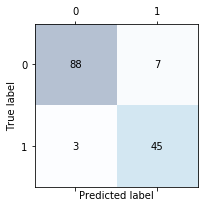

In [275]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

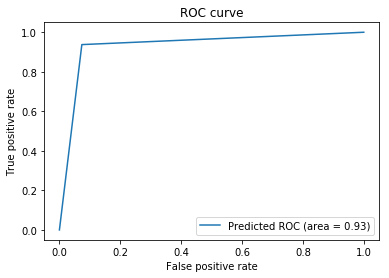

In [287]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='Predicted ROC (area = %0.2f)'%auc(fpr,tpr))
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.plot()
plt.show()

In [288]:
prec = precision_score(y_test, y_pred)
print(f'Precision score: {prec*100:.2f}%')

Precision score: 86.54%


In [289]:
rec = recall_score(y_test, y_pred)
print(f'Recall score: {rec*100:.2f}%')

Recall score: 93.75%
